In [36]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [16, 6]

In [2]:
df_trolls = pd.read_csv("dataset_troll_all.csv")
df_users = pd.read_csv("dataset_users_trial.csv")
df = pd.concat([df_trolls, df_users])

In [6]:
df_trolls.shape, df_users.shape

((166688, 6), (24760, 6))

In [9]:
df.sample(5).head()

,content,followers,following,retweet,created_at,troll
70349,RT @pabelml: INAudito: - La compañera que reco...,7.0,22.0,True,2019-04-18 15:48:01,True
10898,@SCC1705 https://t.co/js9QoU770J,39.0,89.0,False,2019-07-18 16:41:48,True
52583,@LaCarreno189 @miligonzzz MILI dijo el COMICO ...,62.0,184.0,False,2019-08-12 01:28:15,True
71315,@Elvetadoportui1 @MashiRafael Calla mmv,21.0,88.0,False,2019-06-15 17:05:09,True
3253,@JorgeGlasLibre @MashiRafael @JorgeGlas @ecuai...,8.0,87.0,False,2019-04-22 17:17:15,True


# Data distribution

In [46]:
users_copy = df_users.copy()
trolls_copy = df_trolls.copy()
n = 10000

In [48]:
users_copy['created_at'] = users_copy['created_at'].apply(pd.to_datetime)
trolls_copy['created_at'] = trolls_copy['created_at'].apply(pd.to_datetime)

In [53]:
troll_range = trolls_copy[
    (trolls_copy.created_at >= '2019-01-01') &
    (trolls_copy.created_at <= '2019-08-10')]

In [56]:
users_range = users_copy[
    (users_copy.created_at >= '2019-01-01') &
    (users_copy.created_at <= '2019-08-10')]

In [57]:
users_range.shape

(10780, 6)

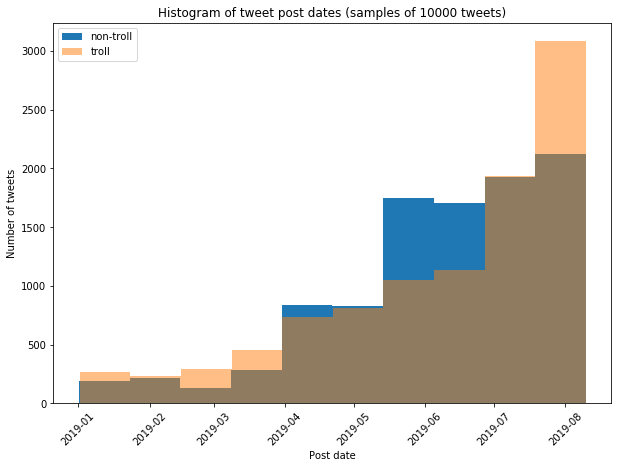

In [59]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.set_title('Histogram of tweet post dates (samples of 10000 tweets)')
ax.set_ylabel('Number of tweets')
ax.set_xlabel('Post date')

nontroll_dates = users_range.created_at.sample(n)
troll_dates = troll_range.created_at.sample(n)

ax.hist(nontroll_dates, bins=10, label='non-troll')
ax.hist(troll_dates, bins=10, label='troll', alpha=0.5)

ax.legend()
ax.tick_params(axis='x', rotation=45)

### Followers

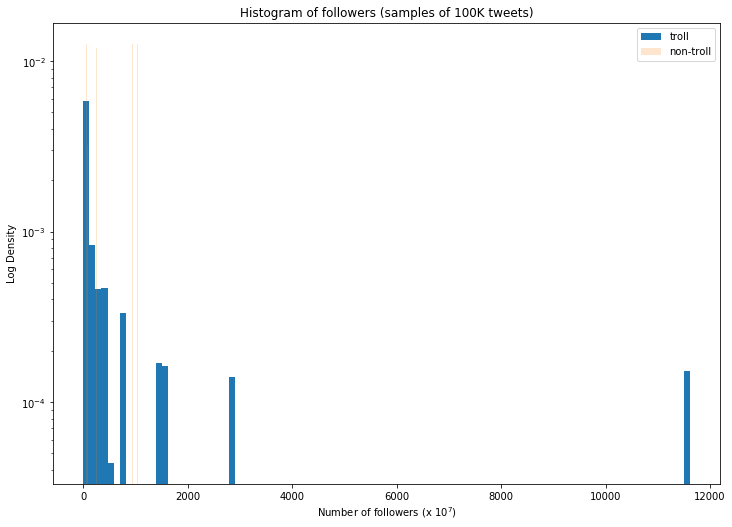

In [61]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
fig.tight_layout()

ax.set_title('Histogram of followers (samples of 100K tweets)')
ax.set_ylabel('Log Density')
ax.set_xlabel('Number of followers (x $10^7$)')

troll_followers = df_trolls.followers.sample(n)
nontroll_followers = df_users.followers.sample(n)

ax.hist(troll_followers, bins=100, label='troll', density=True, log=True)
ax.hist(nontroll_followers, bins=100, label='non-troll', density=True, log=True, alpha=0.2)

ax.legend()
plt.show()

### Following

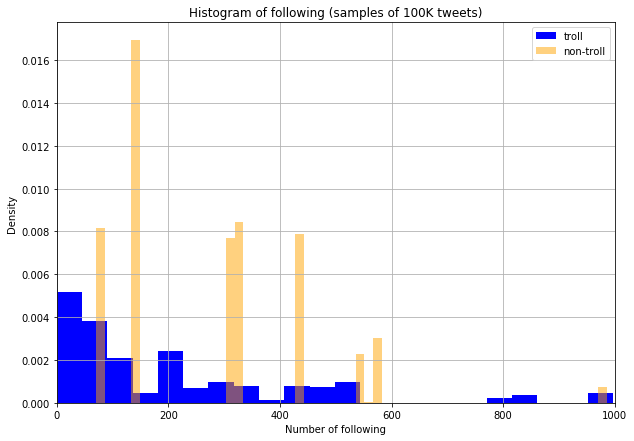

In [67]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.set_title('Histogram of following (samples of 1000 tweets)')
ax.set_ylabel('Density')
ax.set_xlabel('Number of following')
df_trolls.following.sample(n).hist(ax=ax, bins=100, label='troll', color='blue', alpha=1, density=True)
df_users.following.sample(n).hist(ax=ax, bins=100, label='non-troll', color='orange', alpha=0.5, density=True)
ax.set_xlim(0, 1000)
ax.legend()
plt.show()


# Posts dates distribution

In [30]:
df['created_at'] = pd.to_datetime(pd.to_datetime(df['created_at']))
df_trolls['created_at'] = pd.to_datetime(pd.to_datetime(df_trolls['created_at']))
df_users['created_at'] = pd.to_datetime(pd.to_datetime(df_users['created_at']))

### All users interactions

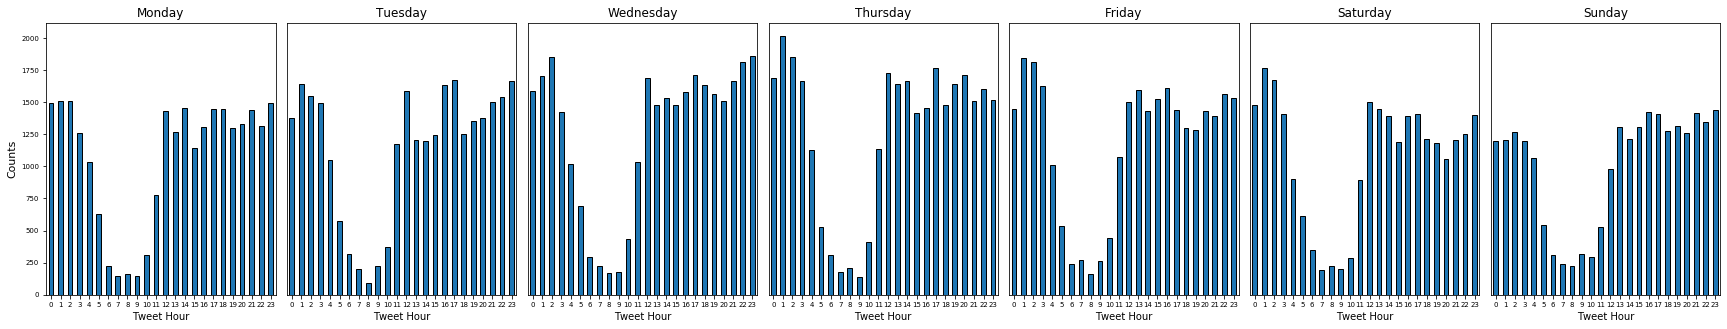

In [37]:
fig, ax = plt.subplots(ncols=7, figsize=(30,5))
plt.subplots_adjust(wspace=0.05)  #Remove some whitespace between subplots

for idx, gp in df.groupby(df['created_at'].dt.dayofweek):
    ax[int(idx)].set_title(gp['created_at'].dt.day_name().iloc[0])  #Set title to the weekday

    (gp.groupby(gp['created_at'].dt.hour).size().rename_axis('Tweet Hour').to_frame('')
        .reindex(np.arange(0,24,1)).fillna(0)
        .plot(kind='bar', ax=ax[int(idx)], rot=0, ec='k', legend=False))

    # Ticks and labels on leftmost only
    if idx == 0:
        _ = ax[int(idx)].set_ylabel('Counts', fontsize=11)

    _ = ax[int(idx)].tick_params(axis='both', which='major', labelsize=7,
                            labelleft=(idx == 0), left=(idx == 0))

# Consistent bounds between subplots. 
lb, ub = list(zip(*[axis.get_ylim() for axis in ax]))
for axis in ax:
    axis.set_ylim(min(lb), max(ub)) 

plt.show()

### Trolls interactions by day

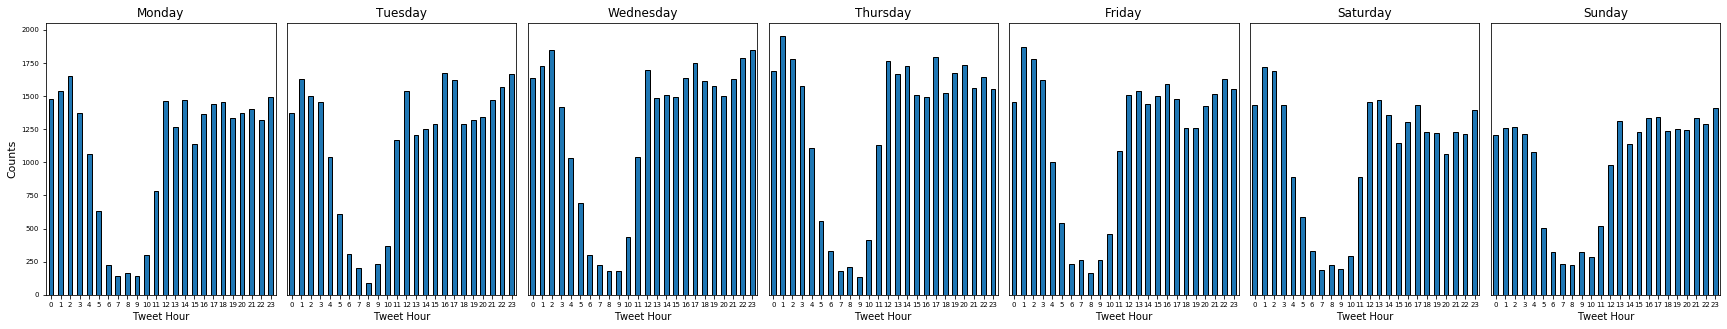

In [31]:
fig, ax = plt.subplots(ncols=7, figsize=(30,5))
plt.subplots_adjust(wspace=0.05)  #Remove some whitespace between subplots

for idx, gp in df.groupby(df_trolls['created_at'].dt.dayofweek):
    ax[int(idx)].set_title(gp['created_at'].dt.day_name().iloc[0])  #Set title to the weekday

    (gp.groupby(gp['created_at'].dt.hour).size().rename_axis('Tweet Hour').to_frame('')
        .reindex(np.arange(0,24,1)).fillna(0)
        .plot(kind='bar', ax=ax[int(idx)], rot=0, ec='k', legend=False))

    # Ticks and labels on leftmost only
    if idx == 0:
        _ = ax[int(idx)].set_ylabel('Counts', fontsize=11)

    _ = ax[int(idx)].tick_params(axis='both', which='major', labelsize=7,
                            labelleft=(idx == 0), left=(idx == 0))

# Consistent bounds between subplots. 
lb, ub = list(zip(*[axis.get_ylim() for axis in ax]))
for axis in ax:
    axis.set_ylim(min(lb), max(ub)) 

plt.show()

### No trolls interactions by day

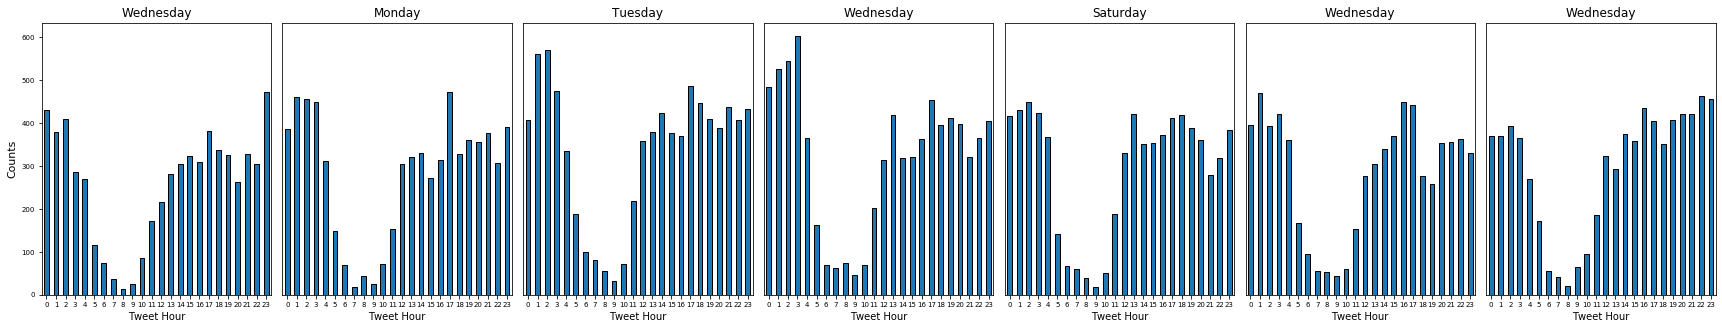

In [33]:
fig, ax = plt.subplots(ncols=7, figsize=(30,5))
plt.subplots_adjust(wspace=0.05)  #Remove some whitespace between subplots

for idx, gp in df.groupby(df_users['created_at'].dt.dayofweek):
    ax[int(idx)].set_title(gp['created_at'].dt.day_name().iloc[0])  #Set title to the weekday

    (gp.groupby(gp['created_at'].dt.hour).size().rename_axis('Tweet Hour').to_frame('')
        .reindex(np.arange(0,24,1)).fillna(0)
        .plot(kind='bar', ax=ax[int(idx)], rot=0, ec='k', legend=False))

    # Ticks and labels on leftmost only
    if idx == 0:
        _ = ax[int(idx)].set_ylabel('Counts', fontsize=11)

    _ = ax[int(idx)].tick_params(axis='both', which='major', labelsize=7,
                            labelleft=(idx == 0), left=(idx == 0))

# Consistent bounds between subplots. 
lb, ub = list(zip(*[axis.get_ylim() for axis in ax]))
for axis in ax:
    axis.set_ylim(min(lb), max(ub)) 

plt.show()

### Retweets 

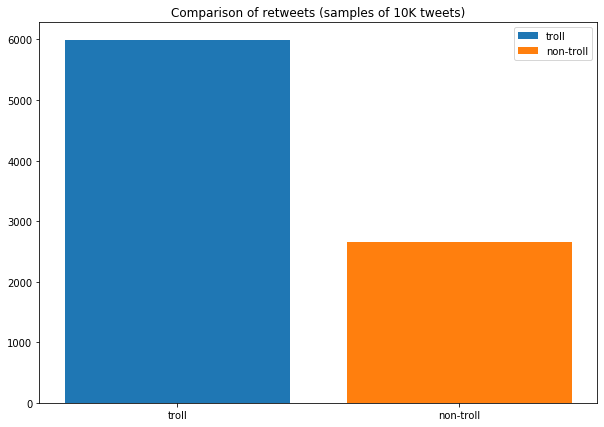

In [39]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.set_title('Comparison of retweets (samples of 10K tweets)')

troll_retweets = np.sum(df_trolls['retweet'].sample(10000))
nontroll_retweets = np.sum(df_users['retweet'].sample(10000))

ax.bar(['troll'],troll_retweets,label='troll')
ax.bar(['non-troll'],nontroll_retweets,label='non-troll')

ax.legend()
plt.show()

### Links

In [42]:
def has_link(text):
    return 't.co' in text

In [43]:
def compute_link_percentage(df, text_column_name):
    vc = df[text_column_name].aggregate(has_link).value_counts()
    return vc[True]/(vc[True] + vc[False])

In [44]:
link_percentage_troll = compute_link_percentage(df_trolls, 'content')
link_percentage_non_troll = compute_link_percentage(df_users, 'content')

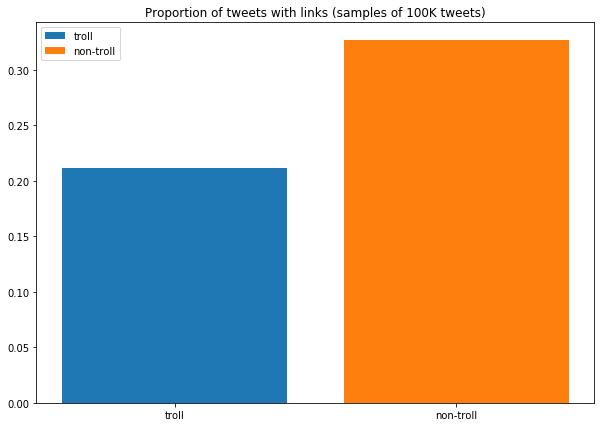

In [45]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.set_title('Proportion of tweets with links (samples of 100K tweets)')

ax.bar(['troll'],link_percentage_troll,label='troll')
ax.bar(['non-troll'],link_percentage_non_troll,label='non-troll')

ax.legend()
plt.show()
